# Data Split

In [1]:
import tensorflow as tf

In [2]:
from tensorflow import keras

In [3]:
import pandas as pd

In [4]:
df = pd.read_csv('practice.csv')
df.head()

,SB_D,SB_R,ERA,ER,CG,SHO,RA,R,AB,H,...,FP,SV,IPOuts,HA,HRA,BBA,SOA,E,DP,W
0,124,64,5.76,827,1,2,6.32,826,5109,1478,...,0.977,24,3878,1520,155,634,976,124,229,66
1,136,101,4.97,705,7,5,5.54,803,4999,1429,...,0.979,38,3828,1456,131,561,965,111,219,70
2,115,96,5.92,838,1,2,6.55,672,4963,1369,...,0.976,27,3819,1593,145,560,980,130,264,53
3,80,121,5.04,721,2,5,5.64,786,5051,1464,...,0.981,34,3863,1426,122,539,909,103,217,71
4,90,145,5.63,792,2,5,6.15,777,5001,1439,...,0.983,27,3799,1486,161,585,1009,91,229,66


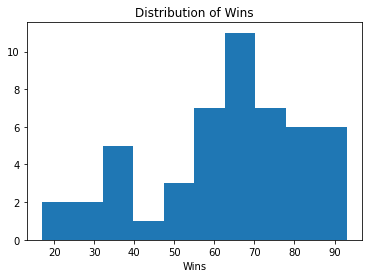

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.hist(df['W'])
plt.xlabel('Wins')
plt.title('Distribution of Wins')

plt.show()

In [6]:
df.corr()['W']

SB_D      0.406149
SB_R      0.623423
ERA      -0.313221
ER        0.503294
CG        0.209995
SHO       0.473576
RA       -0.339742
R         0.876900
AB        0.838537
H         0.867653
2B        0.818614
3B        0.607394
HR        0.678608
BB        0.627698
SO        0.806856
Rank     -0.522707
G         0.828139
FP        0.109302
SV        0.922951
IPOuts    0.837875
HA        0.732641
HRA       0.491891
BBA       0.627698
SOA       0.806856
E         0.664863
DP        0.259039
W         1.000000
Name: W, dtype: float64

In [7]:
x_data = df.values[:, 0:26]
x_data

array([[124.  ,  64.  ,   5.76, ..., 976.  , 124.  , 229.  ],
       [136.  , 101.  ,   4.97, ..., 965.  , 111.  , 219.  ],
       [115.  ,  96.  ,   5.92, ..., 980.  , 130.  , 264.  ],
       ...,
       [ 82.  ,  44.  ,   5.46, ..., 447.  ,  46.  ,  53.  ],
       [ 34.  ,  81.  ,   4.61, ..., 401.  ,  43.  ,  57.  ],
       [ 54.  ,  65.  ,   4.37, ..., 425.  ,  47.  ,  62.  ]])

In [8]:
y_data = df.values[:, [26]]
y_data

array([[66.],
       [70.],
       [53.],
       [71.],
       [66.],
       [83.],
       [93.],
       [69.],
       [65.],
       [77.],
       [61.],
       [87.],
       [50.],
       [69.],
       [80.],
       [79.],
       [84.],
       [75.],
       [55.],
       [69.],
       [77.],
       [70.],
       [59.],
       [68.],
       [68.],
       [58.],
       [93.],
       [78.],
       [68.],
       [75.],
       [58.],
       [62.],
       [71.],
       [79.],
       [48.],
       [73.],
       [88.],
       [88.],
       [60.],
       [86.],
       [17.],
       [33.],
       [31.],
       [34.],
       [30.],
       [42.],
       [38.],
       [21.],
       [34.],
       [38.]])

# Scaling

In [9]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [10]:
x_data = scaler.fit_transform(x_data)

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.1, random_state=7)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((45, 26), (45, 1), (5, 26), (5, 1))

# Linear Regression

In [10]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression().fit(X_train, y_train)
print("기울기:", lr.coef_)  # [0.39390555]
print("절편:", lr.intercept_)  # -0.03180434302675973
print("훈련 정확도:{:.5f}".format(lr.score(X_train, y_train)))
print("테스트 정확도:{:.5f}".format(lr.score(X_test, y_test)))

기울기: [[ -0.18236276   0.14671256   8.20986015 -18.69091666  -1.17798803
    0.67714682  -2.27818537  18.94768164   6.7835888  -13.71753123
    1.41563051  -2.14874987  -1.44882931   1.61061913  -2.10618722
   -3.74254544  15.82163502   0.96382358   5.75196783  -6.85763062
    8.25212526  -0.76920751   1.61061913  -2.10618722   2.74777861
   -1.52243656]]
절편: [63.21471165]
훈련 정확도:0.99039
테스트 정확도:0.92562


### DNN 구성

In [12]:
%%time
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import SGD

model = Sequential()
model.add(Dense(256, activation='relu', input_shape=(26,)))
model.add(Dense(100, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))
model.compile(loss='mse', optimizer='rmsprop', metrics=['mae'])

hist = model.fit(X_train, y_train, epochs=100, batch_size=1, validation_data=(X_test, y_test), shuffle=True)

ModuleNotFoundError: No module named 'keras'

#### 하이퍼파라미터 튜닝

In [12]:
import numpy as np

In [13]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [27]:
def build_model(n_hidden=1, n_neurons=30, learning_rate=3e-3, input_shape=[26]):
    model = keras.models.Sequential()
    model.add(keras.layers.InputLayer(input_shape=input_shape))
    for layer in range(n_hidden):
        model.add(keras.layers.Dense(n_neurons, activation="relu"))
    model.add(keras.layers.Dense(1))
    optimizer = keras.optimizers.SGD(lr=learning_rate)
    model.compile(loss="mse", optimizer=optimizer, metrics=['mae'])
    return model

In [28]:
keras_reg = keras.wrappers.scikit_learn.KerasRegressor(build_model)

In [29]:
keras_reg.fit(X_train, y_train, epochs=100,
              validation_data=(X_test, y_test),
              callbacks=[keras.callbacks.EarlyStopping(patience=10)])

Train on 45 samples, validate on 5 samples
Epoch 1/100
45/45 [==============================] - 0s 7ms/sample - loss: 4383.6679 - mae: 63.2355 - val_loss: 3206.2322 - val_mae: 53.9824
Epoch 2/100
45/45 [==============================] - 0s 287us/sample - loss: 3465.7912 - mae: 55.3721 - val_loss: 1469.9297 - val_mae: 36.1804
Epoch 3/100
45/45 [==============================] - 0s 266us/sample - loss: 1020.2196 - mae: 27.6330 - val_loss: 329.8125 - val_mae: 15.1043
Epoch 4/100
45/45 [==============================] - 0s 355us/sample - loss: 170.1011 - mae: 10.5877 - val_loss: 131.4469 - val_mae: 9.6813
Epoch 5/100
45/45 [==============================] - 0s 288us/sample - loss: 132.9995 - mae: 9.5555 - val_loss: 205.6678 - val_mae: 12.3588
Epoch 6/100
45/45 [==============================] - 0s 332us/sample - loss: 127.5974 - mae: 9.1995 - val_loss: 93.8389 - val_mae: 6.9645
Epoch 7/100
45/45 [==============================] - 0s 377us/sample - loss: 74.9332 - mae: 7.0930 - val_loss: 68

In [30]:
mse_test = keras_reg.score(X_test, y_test)

5/5 [==============================] - 0s 589us/sample - loss: 17.3176 - mae: 3.7482


In [31]:
from scipy.stats import reciprocal
from sklearn.model_selection import RandomizedSearchCV

param_distribs = {
    "n_hidden": [0, 1, 2, 3],
    "n_neurons": np.arange(1, 100),
    "learning_rate": reciprocal(3e-4, 3e-2),
}

rnd_search_cv = RandomizedSearchCV(keras_reg, param_distribs, n_iter=10, cv=3, verbose=2)
rnd_search_cv.fit(X_train, y_train, epochs=100,
                  validation_data=(X_test, y_test),
                  callbacks=[keras.callbacks.EarlyStopping(patience=10)])

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] learning_rate=0.00037192261022352417, n_hidden=3, n_neurons=80 ..
Train on 30 samples, validate on 5 samples
Epoch 1/100


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


30/30 [==============================] - 0s 15ms/sample - loss: 4431.0610 - mae: 63.2552 - val_loss: 3715.9390 - val_mae: 58.8129
Epoch 2/100
30/30 [==============================] - 0s 499us/sample - loss: 4372.8218 - mae: 62.7707 - val_loss: 3669.0586 - val_mae: 58.3841
Epoch 3/100
30/30 [==============================] - 0s 399us/sample - loss: 4309.7090 - mae: 62.2469 - val_loss: 3612.3813 - val_mae: 57.8660
Epoch 4/100
30/30 [==============================] - 0s 532us/sample - loss: 4231.3584 - mae: 61.6048 - val_loss: 3536.7095 - val_mae: 57.1744
Epoch 5/100
30/30 [==============================] - 0s 565us/sample - loss: 4121.7021 - mae: 60.7108 - val_loss: 3426.0554 - val_mae: 56.1570
Epoch 6/100
30/30 [==============================] - 0s 565us/sample - loss: 3957.0562 - mae: 59.3615 - val_loss: 3250.9448 - val_mae: 54.5356
Epoch 7/100
30/30 [==============================] - 0s 499us/sample - loss: 3692.6606 - mae: 57.1696 - val_loss: 2950.9890 - val_mae: 51.7075
Epoch 8/100


Epoch 60/100
30/30 [==============================] - 0s 432us/sample - loss: 44.8629 - mae: 5.8138 - val_loss: 47.8907 - val_mae: 5.6543
Epoch 61/100
30/30 [==============================] - 0s 399us/sample - loss: 37.6727 - mae: 5.0073 - val_loss: 135.5552 - val_mae: 9.1540
Epoch 62/100
30/30 [==============================] - 0s 366us/sample - loss: 47.2980 - mae: 6.0140 - val_loss: 46.4121 - val_mae: 5.5031
Epoch 63/100
30/30 [==============================] - 0s 432us/sample - loss: 39.0280 - mae: 5.1020 - val_loss: 136.1935 - val_mae: 9.1245
Epoch 64/100
30/30 [==============================] - 0s 432us/sample - loss: 49.3903 - mae: 6.1835 - val_loss: 45.1028 - val_mae: 5.3745
Epoch 65/100
30/30 [==============================] - 0s 432us/sample - loss: 40.1358 - mae: 5.1931 - val_loss: 137.1284 - val_mae: 9.1253
Epoch 66/100
30/30 [==============================] - 0s 465us/sample - loss: 51.3192 - mae: 6.3250 - val_loss: 44.5727 - val_mae: 5.2946
Epoch 67/100
30/30 [===========

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.2s remaining:    0.0s


30/30 [==============================] - 1s 19ms/sample - loss: 4109.4888 - mae: 61.2513 - val_loss: 3660.3469 - val_mae: 58.2907
Epoch 2/100
30/30 [==============================] - 0s 399us/sample - loss: 4048.6724 - mae: 60.7549 - val_loss: 3605.2480 - val_mae: 57.8099
Epoch 3/100
30/30 [==============================] - 0s 332us/sample - loss: 3974.2004 - mae: 60.1458 - val_loss: 3529.7837 - val_mae: 57.1474
Epoch 4/100
30/30 [==============================] - 0s 399us/sample - loss: 3870.6128 - mae: 59.2941 - val_loss: 3415.7786 - val_mae: 56.1365
Epoch 5/100
30/30 [==============================] - 0s 465us/sample - loss: 3714.6985 - mae: 58.0021 - val_loss: 3236.4766 - val_mae: 54.5282
Epoch 6/100
30/30 [==============================] - 0s 465us/sample - loss: 3468.7817 - mae: 55.9220 - val_loss: 2930.2654 - val_mae: 51.6969
Epoch 7/100
30/30 [==============================] - 0s 465us/sample - loss: 3050.2747 - mae: 52.2281 - val_loss: 2365.9868 - val_mae: 46.0773
Epoch 8/100


30/30 [==============================] - 0s 565us/sample - loss: 7.9808 - mae: 2.3158 - val_loss: 56.1053 - val_mae: 6.3025
Epoch 61/100
30/30 [==============================] - 0s 532us/sample - loss: 7.7433 - mae: 2.2512 - val_loss: 56.8250 - val_mae: 6.1732
Epoch 62/100
30/30 [==============================] - 0s 532us/sample - loss: 7.5372 - mae: 2.2431 - val_loss: 55.3916 - val_mae: 6.2805
Epoch 63/100
30/30 [==============================] - 0s 499us/sample - loss: 7.3241 - mae: 2.1860 - val_loss: 56.0771 - val_mae: 6.1424
Epoch 64/100
30/30 [==============================] - 0s 499us/sample - loss: 7.1193 - mae: 2.1731 - val_loss: 54.6561 - val_mae: 6.2490
Epoch 65/100
30/30 [==============================] - 0s 465us/sample - loss: 6.9333 - mae: 2.1251 - val_loss: 55.3835 - val_mae: 6.1118
Epoch 66/100
30/30 [==============================] - 0s 499us/sample - loss: 6.7444 - mae: 2.1095 - val_loss: 53.9091 - val_mae: 6.2134
Epoch 67/100
30/30 [==============================] - 

Epoch 18/100
30/30 [==============================] - 0s 465us/sample - loss: 104.2087 - mae: 8.4297 - val_loss: 93.9161 - val_mae: 8.2662
Epoch 19/100
30/30 [==============================] - 0s 532us/sample - loss: 100.7196 - mae: 7.7289 - val_loss: 170.3945 - val_mae: 10.7077
Epoch 20/100
30/30 [==============================] - 0s 499us/sample - loss: 106.5564 - mae: 8.8532 - val_loss: 89.7885 - val_mae: 7.6185
Epoch 21/100
30/30 [==============================] - 0s 499us/sample - loss: 104.7345 - mae: 8.1784 - val_loss: 184.8899 - val_mae: 11.1191
Epoch 22/100
30/30 [==============================] - 0s 532us/sample - loss: 123.3026 - mae: 9.7349 - val_loss: 93.3728 - val_mae: 7.8078
Epoch 23/100
30/30 [==============================] - 0s 898us/sample - loss: 118.3060 - mae: 8.7793 - val_loss: 209.2710 - val_mae: 11.6657
Epoch 24/100
30/30 [==============================] - 0s 565us/sample - loss: 156.3207 - mae: 10.9884 - val_loss: 103.7147 - val_mae: 7.9758
Epoch 25/100
30/30 

Epoch 45/100
30/30 [==============================] - 0s 332us/sample - loss: 37.8563 - mae: 5.0290 - val_loss: 108.8747 - val_mae: 7.2960
Epoch 46/100
30/30 [==============================] - 0s 365us/sample - loss: 37.0784 - mae: 4.9754 - val_loss: 105.7023 - val_mae: 7.1651
Epoch 47/100
30/30 [==============================] - 0s 399us/sample - loss: 36.3385 - mae: 4.9235 - val_loss: 102.6859 - val_mae: 7.0376
Epoch 48/100
30/30 [==============================] - 0s 399us/sample - loss: 35.6381 - mae: 4.8728 - val_loss: 99.8226 - val_mae: 6.9159
Epoch 49/100
30/30 [==============================] - 0s 332us/sample - loss: 34.9710 - mae: 4.8240 - val_loss: 97.0927 - val_mae: 6.7986
Epoch 50/100
30/30 [==============================] - 0s 432us/sample - loss: 34.3357 - mae: 4.7766 - val_loss: 94.4871 - val_mae: 6.6850
Epoch 51/100
30/30 [==============================] - 0s 399us/sample - loss: 33.7301 - mae: 4.7306 - val_loss: 91.9990 - val_mae: 6.5753
Epoch 52/100
30/30 [===========

Epoch 3/100
30/30 [==============================] - 0s 299us/sample - loss: 3919.8713 - mae: 59.7159 - val_loss: 3487.7395 - val_mae: 56.7664
Epoch 4/100
30/30 [==============================] - 0s 300us/sample - loss: 3795.7419 - mae: 58.6708 - val_loss: 3373.3433 - val_mae: 55.7442
Epoch 5/100
30/30 [==============================] - 0s 366us/sample - loss: 3644.7395 - mae: 57.4037 - val_loss: 3231.2397 - val_mae: 54.4784
Epoch 6/100
30/30 [==============================] - 0s 332us/sample - loss: 3457.7776 - mae: 55.8279 - val_loss: 3052.4856 - val_mae: 52.8805
Epoch 7/100
30/30 [==============================] - 0s 332us/sample - loss: 3223.2427 - mae: 53.8214 - val_loss: 2829.5437 - val_mae: 50.8507
Epoch 8/100
30/30 [==============================] - 0s 399us/sample - loss: 2933.2830 - mae: 51.2630 - val_loss: 2560.1943 - val_mae: 48.3143
Epoch 9/100
30/30 [==============================] - 0s 332us/sample - loss: 2586.4136 - mae: 48.0392 - val_loss: 2242.1089 - val_mae: 45.1503

Epoch 62/100
30/30 [==============================] - 0s 334us/sample - loss: 25.1304 - mae: 3.9958 - val_loss: 48.9637 - val_mae: 5.7536
Epoch 63/100
30/30 [==============================] - 0s 332us/sample - loss: 24.5773 - mae: 3.9548 - val_loss: 48.3459 - val_mae: 5.7257
Epoch 64/100
30/30 [==============================] - 0s 366us/sample - loss: 24.0459 - mae: 3.9147 - val_loss: 47.7634 - val_mae: 5.7009
Epoch 65/100
30/30 [==============================] - 0s 331us/sample - loss: 23.5357 - mae: 3.8755 - val_loss: 47.1980 - val_mae: 5.6753
Epoch 66/100
30/30 [==============================] - 0s 365us/sample - loss: 23.0458 - mae: 3.8373 - val_loss: 46.6604 - val_mae: 5.6518
Epoch 67/100
30/30 [==============================] - 0s 333us/sample - loss: 22.5740 - mae: 3.8037 - val_loss: 46.1400 - val_mae: 5.6282
Epoch 68/100
30/30 [==============================] - 0s 299us/sample - loss: 22.1197 - mae: 3.7703 - val_loss: 45.6296 - val_mae: 5.6043
Epoch 69/100
30/30 [==============

Epoch 19/100
30/30 [==============================] - 0s 333us/sample - loss: 213.9785 - mae: 12.0508 - val_loss: 245.7534 - val_mae: 14.1178
Epoch 20/100
30/30 [==============================] - 0s 299us/sample - loss: 198.7887 - mae: 11.5787 - val_loss: 223.4710 - val_mae: 13.4114
Epoch 21/100
30/30 [==============================] - 0s 333us/sample - loss: 185.5967 - mae: 11.1807 - val_loss: 204.0437 - val_mae: 12.7715
Epoch 22/100
30/30 [==============================] - 0s 367us/sample - loss: 173.8815 - mae: 10.8149 - val_loss: 186.8709 - val_mae: 12.1781
Epoch 23/100
30/30 [==============================] - 0s 333us/sample - loss: 163.3629 - mae: 10.4679 - val_loss: 171.6169 - val_mae: 11.6210
Epoch 24/100
30/30 [==============================] - 0s 333us/sample - loss: 153.8781 - mae: 10.1387 - val_loss: 158.0382 - val_mae: 11.0946
Epoch 25/100
30/30 [==============================] - 0s 332us/sample - loss: 145.2614 - mae: 9.8216 - val_loss: 145.8223 - val_mae: 10.5901
Epoch 2

Epoch 79/100
30/30 [==============================] - 0s 299us/sample - loss: 38.5538 - mae: 4.9764 - val_loss: 33.6342 - val_mae: 4.8853
Epoch 80/100
30/30 [==============================] - 0s 299us/sample - loss: 37.9684 - mae: 4.9382 - val_loss: 33.4645 - val_mae: 4.8783
Epoch 81/100
30/30 [==============================] - 0s 298us/sample - loss: 37.4077 - mae: 4.9012 - val_loss: 33.1935 - val_mae: 4.8631
Epoch 82/100
30/30 [==============================] - 0s 299us/sample - loss: 36.8581 - mae: 4.8700 - val_loss: 33.0532 - val_mae: 4.8591
Epoch 83/100
30/30 [==============================] - 0s 266us/sample - loss: 36.3152 - mae: 4.8360 - val_loss: 32.9223 - val_mae: 4.8538
Epoch 84/100
30/30 [==============================] - 0s 333us/sample - loss: 35.7951 - mae: 4.8030 - val_loss: 32.6974 - val_mae: 4.8404
Epoch 85/100
30/30 [==============================] - 0s 299us/sample - loss: 35.2766 - mae: 4.7721 - val_loss: 32.5706 - val_mae: 4.8336
Epoch 86/100
30/30 [==============

Epoch 8/100
30/30 [==============================] - 0s 432us/sample - loss: 421846293334196224.0000 - mae: 649496960.0000 - val_loss: 413159567359213568.0000 - val_mae: 642774912.0000
Epoch 9/100
30/30 [==============================] - 0s 432us/sample - loss: 413159601718951936.0000 - mae: 642774912.0000 - val_loss: 404651752541913088.0000 - val_mae: 636122368.0000
Epoch 10/100
30/30 [==============================] - 0s 465us/sample - loss: 404651752541913088.0000 - mae: 636122368.0000 - val_loss: 396319103670812672.0000 - val_mae: 629538816.0000
Epoch 11/100
15/15 [==============================] - 0s 266us/sample - loss: 388158081692860416.0000 - mae: 623023360.0000
[CV]  learning_rate=0.0051747964719537, n_hidden=3, n_neurons=55, total=   0.9s
[CV] learning_rate=0.027770456976200626, n_hidden=0, n_neurons=3 .....
Train on 30 samples, validate on 5 samples
Epoch 1/100
30/30 [==============================] - 0s 12ms/sample - loss: 4445.6733 - mae: 63.3467 - val_loss: 3418.9102 - v

Epoch 52/100
30/30 [==============================] - 0s 430us/sample - loss: 29.8214 - mae: 4.4405 - val_loss: 103.6832 - val_mae: 8.7343
Epoch 53/100
30/30 [==============================] - 0s 398us/sample - loss: 28.3077 - mae: 4.3353 - val_loss: 99.6145 - val_mae: 8.5228
Epoch 54/100
30/30 [==============================] - 0s 431us/sample - loss: 26.9234 - mae: 4.2347 - val_loss: 95.7899 - val_mae: 8.3202
Epoch 55/100
30/30 [==============================] - 0s 399us/sample - loss: 25.6559 - mae: 4.1386 - val_loss: 92.1915 - val_mae: 8.1263
Epoch 56/100
30/30 [==============================] - 0s 334us/sample - loss: 24.4935 - mae: 4.0479 - val_loss: 88.8028 - val_mae: 7.9404
Epoch 57/100
30/30 [==============================] - 0s 299us/sample - loss: 23.4262 - mae: 3.9663 - val_loss: 85.6089 - val_mae: 7.7623
Epoch 58/100
30/30 [==============================] - 0s 432us/sample - loss: 22.4448 - mae: 3.8946 - val_loss: 82.5960 - val_mae: 7.5915
Epoch 59/100
30/30 [=============

Epoch 10/100
30/30 [==============================] - 0s 332us/sample - loss: 1382.8237 - mae: 36.3163 - val_loss: 1320.8455 - val_mae: 35.5467
Epoch 11/100
30/30 [==============================] - 0s 332us/sample - loss: 1235.1938 - mae: 34.2290 - val_loss: 1192.1302 - val_mae: 33.6966
Epoch 12/100
30/30 [==============================] - 0s 332us/sample - loss: 1104.6360 - mae: 32.2707 - val_loss: 1076.2120 - val_mae: 31.9394
Epoch 13/100
30/30 [==============================] - 0s 299us/sample - loss: 989.0047 - mae: 30.4330 - val_loss: 971.8322 - val_mae: 30.2706
Epoch 14/100
30/30 [==============================] - 0s 332us/sample - loss: 886.4509 - mae: 28.7080 - val_loss: 877.8533 - val_mae: 28.6860
Epoch 15/100
30/30 [==============================] - 0s 300us/sample - loss: 795.3760 - mae: 27.0884 - val_loss: 793.2484 - val_mae: 27.1815
Epoch 16/100
30/30 [==============================] - 0s 333us/sample - loss: 714.3948 - mae: 25.5671 - val_loss: 717.0904 - val_mae: 25.7532


Epoch 69/100
30/30 [==============================] - 0s 332us/sample - loss: 13.2395 - mae: 2.8250 - val_loss: 36.8813 - val_mae: 4.0864
Epoch 70/100
30/30 [==============================] - 0s 367us/sample - loss: 12.7899 - mae: 2.7766 - val_loss: 36.4867 - val_mae: 4.0976
Epoch 71/100
30/30 [==============================] - 0s 399us/sample - loss: 12.3721 - mae: 2.7314 - val_loss: 36.1124 - val_mae: 4.1070
Epoch 72/100
30/30 [==============================] - 0s 366us/sample - loss: 11.9834 - mae: 2.6907 - val_loss: 35.7562 - val_mae: 4.1149
Epoch 73/100
30/30 [==============================] - 0s 299us/sample - loss: 11.6212 - mae: 2.6554 - val_loss: 35.4161 - val_mae: 4.1212
Epoch 74/100
30/30 [==============================] - 0s 332us/sample - loss: 11.2835 - mae: 2.6215 - val_loss: 35.0905 - val_mae: 4.1261
Epoch 75/100
30/30 [==============================] - 0s 365us/sample - loss: 10.9682 - mae: 2.5887 - val_loss: 34.7778 - val_mae: 4.1296
Epoch 76/100
30/30 [==============

Epoch 26/100
30/30 [==============================] - 0s 332us/sample - loss: 245.2836 - mae: 14.0945 - val_loss: 332.3314 - val_mae: 17.6485
Epoch 27/100
30/30 [==============================] - 0s 299us/sample - loss: 223.5704 - mae: 13.3793 - val_loss: 305.9416 - val_mae: 16.9067
Epoch 28/100
30/30 [==============================] - 0s 333us/sample - loss: 204.0884 - mae: 12.7053 - val_loss: 281.9741 - val_mae: 16.2034
Epoch 29/100
30/30 [==============================] - 0s 332us/sample - loss: 186.5859 - mae: 12.0980 - val_loss: 260.1861 - val_mae: 15.5364
Epoch 30/100
30/30 [==============================] - 0s 299us/sample - loss: 170.8410 - mae: 11.5274 - val_loss: 240.3605 - val_mae: 14.9037
Epoch 31/100
30/30 [==============================] - 0s 299us/sample - loss: 156.6586 - mae: 10.9881 - val_loss: 222.3033 - val_mae: 14.3032
Epoch 32/100
30/30 [==============================] - 0s 365us/sample - loss: 143.8666 - mae: 10.4780 - val_loss: 205.8408 - val_mae: 13.7332
Epoch 

Epoch 86/100
30/30 [==============================] - 0s 366us/sample - loss: 8.3534 - mae: 2.3470 - val_loss: 14.4460 - val_mae: 3.6212
Epoch 87/100
30/30 [==============================] - 0s 432us/sample - loss: 8.1369 - mae: 2.3238 - val_loss: 14.0672 - val_mae: 3.5740
Epoch 88/100
30/30 [==============================] - 0s 399us/sample - loss: 7.9321 - mae: 2.3012 - val_loss: 13.7071 - val_mae: 3.5283
Epoch 89/100
30/30 [==============================] - 0s 366us/sample - loss: 7.7382 - mae: 2.2790 - val_loss: 13.3646 - val_mae: 3.4839
Epoch 90/100
30/30 [==============================] - 0s 400us/sample - loss: 7.5545 - mae: 2.2572 - val_loss: 13.0386 - val_mae: 3.4408
Epoch 91/100
30/30 [==============================] - 0s 332us/sample - loss: 7.3805 - mae: 2.2360 - val_loss: 12.7283 - val_mae: 3.3989
Epoch 92/100
30/30 [==============================] - 0s 333us/sample - loss: 7.2155 - mae: 2.2151 - val_loss: 12.4327 - val_mae: 3.3583
Epoch 93/100
30/30 [=====================

Train on 30 samples, validate on 5 samples
Epoch 1/100
30/30 [==============================] - 0s 11ms/sample - loss: 4593.0752 - mae: 64.2110 - val_loss: 3674.9109 - val_mae: 58.5348
Epoch 2/100
30/30 [==============================] - 0s 366us/sample - loss: 4341.7500 - mae: 62.5610 - val_loss: 3562.3223 - val_mae: 57.6855
Epoch 3/100
30/30 [==============================] - 0s 332us/sample - loss: 4169.7017 - mae: 61.3647 - val_loss: 3329.9253 - val_mae: 55.8009
Epoch 4/100
30/30 [==============================] - 0s 366us/sample - loss: 3834.2671 - mae: 58.9461 - val_loss: 2858.8491 - val_mae: 51.9297
Epoch 5/100
30/30 [==============================] - 0s 432us/sample - loss: 3127.9685 - mae: 53.5490 - val_loss: 1993.2708 - val_mae: 43.7016
Epoch 6/100
30/30 [==============================] - 0s 432us/sample - loss: 1888.9196 - mae: 42.1199 - val_loss: 973.8511 - val_mae: 30.2454
Epoch 7/100
30/30 [==============================] - 0s 465us/sample - loss: 636.5660 - mae: 23.5814 

Epoch 60/100
30/30 [==============================] - 0s 400us/sample - loss: 19.1718 - mae: 3.5524 - val_loss: 25.3873 - val_mae: 4.0901
Epoch 61/100
30/30 [==============================] - 0s 365us/sample - loss: 18.8769 - mae: 3.5225 - val_loss: 24.8358 - val_mae: 4.0501
Epoch 62/100
30/30 [==============================] - 0s 333us/sample - loss: 18.5746 - mae: 3.4907 - val_loss: 24.3168 - val_mae: 4.0145
Epoch 63/100
30/30 [==============================] - 0s 299us/sample - loss: 18.2805 - mae: 3.4605 - val_loss: 23.8130 - val_mae: 3.9802
Epoch 64/100
30/30 [==============================] - 0s 333us/sample - loss: 17.9938 - mae: 3.4308 - val_loss: 23.3233 - val_mae: 3.9469
Epoch 65/100
30/30 [==============================] - 0s 299us/sample - loss: 17.7142 - mae: 3.4016 - val_loss: 22.8464 - val_mae: 3.9141
Epoch 66/100
30/30 [==============================] - 0s 334us/sample - loss: 17.4415 - mae: 3.3728 - val_loss: 22.3821 - val_mae: 3.8819
Epoch 67/100
30/30 [==============

Epoch 17/100
30/30 [==============================] - 0s 367us/sample - loss: 286.0583 - mae: 12.2972 - val_loss: 218.8491 - val_mae: 10.5494
Epoch 18/100
30/30 [==============================] - 0s 298us/sample - loss: 279.7693 - mae: 12.0400 - val_loss: 214.9313 - val_mae: 10.4104
Epoch 19/100
30/30 [==============================] - 0s 333us/sample - loss: 274.2485 - mae: 11.7992 - val_loss: 211.6275 - val_mae: 10.2865
Epoch 20/100
30/30 [==============================] - 0s 299us/sample - loss: 269.3686 - mae: 11.5928 - val_loss: 208.7926 - val_mae: 10.1753
Epoch 21/100
30/30 [==============================] - 0s 266us/sample - loss: 265.0317 - mae: 11.4123 - val_loss: 206.3181 - val_mae: 10.0745
Epoch 22/100
30/30 [==============================] - 0s 334us/sample - loss: 261.1543 - mae: 11.2396 - val_loss: 204.1208 - val_mae: 9.9818
Epoch 23/100
30/30 [==============================] - 0s 266us/sample - loss: 257.6651 - mae: 11.0826 - val_loss: 202.1378 - val_mae: 9.8959
Epoch 24

Epoch 76/100
30/30 [==============================] - 0s 332us/sample - loss: 201.9585 - mae: 8.4660 - val_loss: 153.1064 - val_mae: 7.3321
Epoch 77/100
30/30 [==============================] - 0s 331us/sample - loss: 201.4295 - mae: 8.4465 - val_loss: 152.6176 - val_mae: 7.3197
Epoch 78/100
30/30 [==============================] - 0s 298us/sample - loss: 200.9050 - mae: 8.4273 - val_loss: 152.1378 - val_mae: 7.3070
Epoch 79/100
30/30 [==============================] - 0s 332us/sample - loss: 200.3849 - mae: 8.4082 - val_loss: 151.6693 - val_mae: 7.2960
Epoch 80/100
30/30 [==============================] - 0s 399us/sample - loss: 199.8676 - mae: 8.3892 - val_loss: 151.2089 - val_mae: 7.2847
Epoch 81/100
30/30 [==============================] - 0s 332us/sample - loss: 199.3539 - mae: 8.3704 - val_loss: 150.7577 - val_mae: 7.2739
Epoch 82/100
30/30 [==============================] - 0s 332us/sample - loss: 198.8439 - mae: 8.3518 - val_loss: 150.3150 - val_mae: 7.2634
Epoch 83/100
30/30 [

Epoch 33/100
30/30 [==============================] - 0s 333us/sample - loss: 39.2074 - mae: 5.1256 - val_loss: 30.4404 - val_mae: 4.7376
Epoch 34/100
30/30 [==============================] - 0s 332us/sample - loss: 38.1001 - mae: 5.0481 - val_loss: 29.9629 - val_mae: 4.6982
Epoch 35/100
30/30 [==============================] - 0s 366us/sample - loss: 37.0446 - mae: 4.9695 - val_loss: 29.5426 - val_mae: 4.6625
Epoch 36/100
30/30 [==============================] - 0s 367us/sample - loss: 36.0596 - mae: 4.8941 - val_loss: 29.0945 - val_mae: 4.6186
Epoch 37/100
30/30 [==============================] - 0s 365us/sample - loss: 35.1319 - mae: 4.8234 - val_loss: 28.7625 - val_mae: 4.5866
Epoch 38/100
30/30 [==============================] - 0s 299us/sample - loss: 34.2498 - mae: 4.7517 - val_loss: 28.4682 - val_mae: 4.5582
Epoch 39/100
30/30 [==============================] - 0s 366us/sample - loss: 33.4253 - mae: 4.6830 - val_loss: 28.1359 - val_mae: 4.5219
Epoch 40/100
30/30 [==============

Epoch 8/100
30/30 [==============================] - 0s 299us/sample - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 9/100
30/30 [==============================] - 0s 332us/sample - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 10/100
30/30 [==============================] - 0s 333us/sample - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 11/100
15/15 [==============================] - 0s 203us/sample - loss: nan - mae: nan
[CV]  learning_rate=0.02298924804076755, n_hidden=1, n_neurons=9, total=   0.5s
[CV] learning_rate=0.02298924804076755, n_hidden=1, n_neurons=9 ......
Train on 30 samples, validate on 5 samples
Epoch 1/100
30/30 [==============================] - 0s 10ms/sample - loss: 4741.0098 - mae: 66.6044 - val_loss: 2668.6990 - val_mae: 46.3528
Epoch 2/100
30/30 [==============================] - 0s 299us/sample - loss: 3038.3264 - mae: 50.8614 - val_loss: 18770.9355 - val_mae: 110.3166
Epoch 3/100
30/30 [==============================] - 0s 

Epoch 40/100
30/30 [==============================] - 0s 399us/sample - loss: 145.3605 - mae: 10.0440 - val_loss: 426.2739 - val_mae: 17.7012
Epoch 41/100
30/30 [==============================] - 0s 432us/sample - loss: 134.4811 - mae: 9.6512 - val_loss: 406.7388 - val_mae: 17.1131
Epoch 42/100
30/30 [==============================] - 0s 499us/sample - loss: 125.6535 - mae: 9.4080 - val_loss: 389.6155 - val_mae: 16.5824
Epoch 43/100
30/30 [==============================] - 0s 432us/sample - loss: 118.3882 - mae: 9.1880 - val_loss: 374.5220 - val_mae: 16.1026
Epoch 44/100
30/30 [==============================] - 0s 465us/sample - loss: 112.3257 - mae: 8.9815 - val_loss: 361.1370 - val_mae: 15.6677
Epoch 45/100
30/30 [==============================] - 0s 465us/sample - loss: 107.1939 - mae: 8.7876 - val_loss: 349.1974 - val_mae: 15.2725
Epoch 46/100
30/30 [==============================] - 0s 432us/sample - loss: 102.7875 - mae: 8.6054 - val_loss: 338.4745 - val_mae: 14.9118
Epoch 47/100

Epoch 99/100
30/30 [==============================] - 0s 432us/sample - loss: 43.8125 - mae: 5.3950 - val_loss: 157.7358 - val_mae: 8.7512
Epoch 100/100
15/15 [==============================] - 0s 266us/sample - loss: 306.3570 - mae: 13.8757
[CV]  learning_rate=0.00032288937857243905, n_hidden=1, n_neurons=84, total=   2.0s
[CV] learning_rate=0.00032288937857243905, n_hidden=1, n_neurons=84 ..
Train on 30 samples, validate on 5 samples
Epoch 1/100
30/30 [==============================] - 0s 16ms/sample - loss: 4165.0903 - mae: 61.7108 - val_loss: 3729.5762 - val_mae: 58.9295
Epoch 2/100
30/30 [==============================] - 0s 399us/sample - loss: 4124.3257 - mae: 61.3744 - val_loss: 3697.0886 - val_mae: 58.6415
Epoch 3/100
30/30 [==============================] - 0s 332us/sample - loss: 4083.9031 - mae: 61.0387 - val_loss: 3664.4492 - val_mae: 58.3515
Epoch 4/100
30/30 [==============================] - 0s 432us/sample - loss: 4043.2393 - mae: 60.6995 - val_loss: 3631.2617 - val_ma

Epoch 55/100
30/30 [==============================] - 0s 399us/sample - loss: 168.2507 - mae: 10.0116 - val_loss: 239.7291 - val_mae: 11.7985
Epoch 56/100
30/30 [==============================] - 0s 465us/sample - loss: 160.1044 - mae: 9.7516 - val_loss: 229.0005 - val_mae: 11.4316
Epoch 57/100
30/30 [==============================] - 0s 465us/sample - loss: 152.6943 - mae: 9.5051 - val_loss: 219.1678 - val_mae: 11.0980
Epoch 58/100
30/30 [==============================] - 0s 499us/sample - loss: 145.9828 - mae: 9.2905 - val_loss: 210.1498 - val_mae: 10.8239
Epoch 59/100
30/30 [==============================] - 0s 465us/sample - loss: 139.8952 - mae: 9.0971 - val_loss: 201.8588 - val_mae: 10.5658
Epoch 60/100
30/30 [==============================] - 0s 432us/sample - loss: 134.3564 - mae: 8.9198 - val_loss: 194.2182 - val_mae: 10.3227
Epoch 61/100
30/30 [==============================] - 0s 465us/sample - loss: 129.3008 - mae: 8.7589 - val_loss: 187.1608 - val_mae: 10.0937
Epoch 62/100

Epoch 12/100
30/30 [==============================] - 0s 399us/sample - loss: 4093.6658 - mae: 61.8497 - val_loss: 3301.6926 - val_mae: 55.4992
Epoch 13/100
30/30 [==============================] - 0s 465us/sample - loss: 3999.5005 - mae: 61.1372 - val_loss: 3230.1489 - val_mae: 54.9075
Epoch 14/100
30/30 [==============================] - 0s 466us/sample - loss: 3895.7200 - mae: 60.3441 - val_loss: 3151.5762 - val_mae: 54.2545
Epoch 15/100
30/30 [==============================] - 0s 399us/sample - loss: 3781.3579 - mae: 59.4599 - val_loss: 3064.9456 - val_mae: 53.5298
Epoch 16/100
30/30 [==============================] - 0s 465us/sample - loss: 3655.3672 - mae: 58.4719 - val_loss: 2970.0103 - val_mae: 52.7273
Epoch 17/100
30/30 [==============================] - 0s 465us/sample - loss: 3517.3157 - mae: 57.3699 - val_loss: 2866.6482 - val_mae: 51.8412
Epoch 18/100
30/30 [==============================] - 0s 465us/sample - loss: 3367.1377 - mae: 56.1464 - val_loss: 2754.0244 - val_mae: 

Epoch 70/100
30/30 [==============================] - 0s 465us/sample - loss: 143.5944 - mae: 9.4776 - val_loss: 141.3826 - val_mae: 9.9331
Epoch 71/100
30/30 [==============================] - 0s 432us/sample - loss: 140.9744 - mae: 9.3867 - val_loss: 137.9361 - val_mae: 9.7697
Epoch 72/100
30/30 [==============================] - 0s 465us/sample - loss: 138.4413 - mae: 9.3088 - val_loss: 134.6196 - val_mae: 9.6089
Epoch 73/100
30/30 [==============================] - 0s 465us/sample - loss: 135.9781 - mae: 9.2319 - val_loss: 131.4320 - val_mae: 9.4513
Epoch 74/100
30/30 [==============================] - 0s 465us/sample - loss: 133.5915 - mae: 9.1562 - val_loss: 128.3743 - val_mae: 9.2972
Epoch 75/100
30/30 [==============================] - 0s 465us/sample - loss: 131.2723 - mae: 9.0814 - val_loss: 125.4105 - val_mae: 9.1441
Epoch 76/100
30/30 [==============================] - 0s 432us/sample - loss: 129.0253 - mae: 9.0076 - val_loss: 122.5606 - val_mae: 8.9940
Epoch 77/100
30/30 [

Epoch 9/100
30/30 [==============================] - 0s 432us/sample - loss: 1787.2721 - mae: 34.2778 - val_loss: 3652.8833 - val_mae: 58.1773
Epoch 10/100
30/30 [==============================] - 0s 465us/sample - loss: 4048.6274 - mae: 60.6591 - val_loss: 3613.0728 - val_mae: 57.7363
Epoch 11/100
30/30 [==============================] - 0s 499us/sample - loss: 3998.0330 - mae: 60.1298 - val_loss: 3561.1719 - val_mae: 57.1199
Epoch 12/100
30/30 [==============================] - 0s 499us/sample - loss: 3931.3274 - mae: 59.3867 - val_loss: 3487.2754 - val_mae: 56.1576
Epoch 13/100
30/30 [==============================] - 0s 432us/sample - loss: 3835.0322 - mae: 58.2173 - val_loss: 3378.3716 - val_mae: 54.5482
Epoch 14/100
30/30 [==============================] - 0s 432us/sample - loss: 3690.5166 - mae: 56.2373 - val_loss: 3225.2056 - val_mae: 51.8157
Epoch 15/100
30/30 [==============================] - 0s 465us/sample - loss: 3486.2500 - mae: 52.8561 - val_loss: 3043.3784 - val_mae: 4

Epoch 3/100
30/30 [==============================] - 0s 432us/sample - loss: 618812.1250 - mae: 727.0488 - val_loss: 77819609088.0000 - val_mae: 128242.8984
Epoch 4/100
30/30 [==============================] - 0s 465us/sample - loss: 53035401216.0000 - mae: 89365.7188 - val_loss: inf - val_mae: 198395138341115849240215552.0000
Epoch 5/100
30/30 [==============================] - 0s 432us/sample - loss: inf - mae: 273430368913933833642967040.0000 - val_loss: nan - val_mae: nan
Epoch 6/100
30/30 [==============================] - 0s 399us/sample - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 7/100
30/30 [==============================] - 0s 432us/sample - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 8/100
30/30 [==============================] - 0s 465us/sample - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 9/100
30/30 [==============================] - 0s 499us/sample - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 10/100
30/30 [=======

[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:   39.6s finished
C:\Users\anen0\anaconda3\envs\tf2\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


45/45 [==============================] - 0s 7ms/sample - loss: 4269.4616 - mae: 63.5132 - val_loss: 2904.0518 - val_mae: 53.4509
Epoch 2/100
45/45 [==============================] - 0s 266us/sample - loss: 3221.4531 - mae: 55.9914 - val_loss: 2465.1047 - val_mae: 49.3570
Epoch 3/100
45/45 [==============================] - 0s 267us/sample - loss: 2523.3948 - mae: 49.7959 - val_loss: 2042.7908 - val_mae: 44.9870
Epoch 4/100
45/45 [==============================] - 0s 222us/sample - loss: 1980.3845 - mae: 44.1669 - val_loss: 1723.4480 - val_mae: 41.1373
Epoch 5/100
45/45 [==============================] - 0s 289us/sample - loss: 1581.4192 - mae: 39.2444 - val_loss: 1355.5339 - val_mae: 36.5546
Epoch 6/100
45/45 [==============================] - 0s 266us/sample - loss: 1262.8470 - mae: 35.0176 - val_loss: 1101.2661 - val_mae: 32.9503
Epoch 7/100
45/45 [==============================] - 0s 267us/sample - loss: 993.6182 - mae: 31.0860 - val_loss: 886.5187 - val_mae: 29.6028
Epoch 8/100
45/

45/45 [==============================] - 0s 288us/sample - loss: 7.6809 - mae: 2.2267 - val_loss: 6.2898 - val_mae: 1.9614
Epoch 61/100
45/45 [==============================] - 0s 288us/sample - loss: 7.2385 - mae: 2.1675 - val_loss: 6.0691 - val_mae: 1.8872
Epoch 62/100
45/45 [==============================] - 0s 288us/sample - loss: 7.3496 - mae: 2.1894 - val_loss: 6.4060 - val_mae: 2.0214
Epoch 63/100
45/45 [==============================] - 0s 266us/sample - loss: 7.2418 - mae: 2.1925 - val_loss: 6.1550 - val_mae: 2.0603
Epoch 64/100
45/45 [==============================] - 0s 265us/sample - loss: 7.4821 - mae: 2.2440 - val_loss: 5.8246 - val_mae: 1.9679
Epoch 65/100
45/45 [==============================] - 0s 310us/sample - loss: 7.9314 - mae: 2.2727 - val_loss: 7.5262 - val_mae: 2.4587
Epoch 66/100
45/45 [==============================] - 0s 289us/sample - loss: 8.7659 - mae: 2.4422 - val_loss: 6.3194 - val_mae: 2.0794
Epoch 67/100
45/45 [==============================] - 0s 266u

RandomizedSearchCV(cv=3, error_score='raise-deprecating',
                   estimator=<tensorflow.python.keras.wrappers.scikit_learn.KerasRegressor object at 0x00000132C7B42908>,
                   iid='warn', n_iter=10, n_jobs=None,
                   param_distributions={'learning_rate': <scipy.stats._distn_infrastructure.rv_frozen object at 0x00000132C7AB6748>,
                                        'n_hidden': [0, 1, 2, 3],
                                        'n_neurons': array([ 1,  2,  3,  4,  5,  6,  7...
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85,
       86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   return_train_sco

In [32]:
rnd_search_cv.best_params_

{'learning_rate': 0.027770456976200626, 'n_hidden': 0, 'n_neurons': 3}

In [33]:
rnd_search_cv.best_score_

-67.18996047973633

In [34]:
rnd_search_cv.best_estimator_

In [35]:
rnd_search_cv.score(X_test, y_test)

5/5 [==============================] - 0s 1ms/sample - loss: 7.4196 - mae: 2.2399


-7.419619560241699

In [36]:
model = rnd_search_cv.best_estimator_.model
model

In [37]:
model.evaluate(X_test, y_test)

5/5 [==============================] - 0s 798us/sample - loss: 7.4196 - mae: 2.2399


[7.419619560241699, 2.2399268]